In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("titanic.csv").copy()

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']].head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [8]:
data=data.drop(['Name'],axis=1)

In [9]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [10]:
data.drop('Cabin', axis=1, inplace=True)

In [11]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [12]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [13]:
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])

In [14]:
le = LabelEncoder()
data['Embarked'] = le.fit_transform(data['Embarked'])

In [15]:
X = data[['Pclass', 'Sex','Age', 'SibSp', 'Parch','Fare','Embarked']].values
Y = data['Survived'].values.reshape(-1, 1)

In [16]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,0,35.0,1,0,113803,53.1000,2
4,5,0,3,1,35.0,0,0,373450,8.0500,2


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train = np.hstack((X_train_scaled, np.ones((X_train_scaled.shape[0], 1))))
X_test = np.hstack((X_test_scaled, np.ones((X_test_scaled.shape[0], 1))))

In [20]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [21]:
def model(X, theta):
    return sigmoid(X.dot(theta))

In [22]:
def cost_function(X, y, theta):
    m = len(y)
    A = model(X, theta)
    A = np.clip(A, 1e-15, 1 - 1e-15)   # Empêche log(0) ou log(1)
    return -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

In [23]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [24]:
def gradient_descent(X, y, learning_rate, n_iterations):
    theta = np.random.randn(X.shape[1], 1)
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [25]:
theta, cost_history = gradient_descent(X_train, Y_train, learning_rate=0.1, n_iterations=1000)

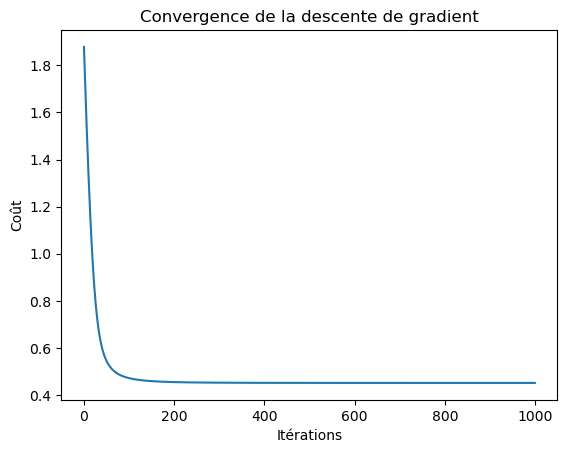

In [29]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient")
plt.show()

In [30]:
pred_train = (model(X_train, theta) >= 0.5).astype(int)
pred_test  = (model(X_test, theta) >= 0.5).astype(int)

In [31]:
print("Accuracy sur le train:", accuracy_score(Y_train, pred_train))
print("Accuracy sur le test :", accuracy_score(Y_test, pred_test))

Accuracy sur le train: 0.7935393258426966
Accuracy sur le test : 0.8324022346368715


In [32]:
from sklearn.linear_model import LogisticRegression 

In [33]:
model_sk=LogisticRegression()
model_sk.fit(X_train,Y_train.reshape(-1))

LogisticRegression()

In [34]:
pred_test=model_sk.predict(X_test)

In [35]:
accuracy_score(Y_test,pred_test)

0.8324022346368715

In [36]:
model_sk.score(X_test,Y_test)

0.8324022346368715